<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Data-Cleaning-and-pre-processing" data-toc-modified-id="1.-Data-Cleaning-and-pre-processing-1">1. Data Cleaning and pre-processing</a></span><ul class="toc-item"><li><span><a href="#1.1.-Download-libraries-and-first-description-of-the-data" data-toc-modified-id="1.1.-Download-libraries-and-first-description-of-the-data-1.1">1.1. Download libraries and first description of the data</a></span></li><li><span><a href="#1.2.-Reviews-Dates" data-toc-modified-id="1.2.-Reviews-Dates-1.2">1.2. Reviews Dates</a></span></li><li><span><a href="#1.3.-Review-Score" data-toc-modified-id="1.3.-Review-Score-1.3">1.3. Review Score</a></span></li><li><span><a href="#1.4.-Reviews-lenght" data-toc-modified-id="1.4.-Reviews-lenght-1.4">1.4. Reviews lenght</a></span></li><li><span><a href="#1.6.-Character-length" data-toc-modified-id="1.6.-Character-length-1.5">1.6. Character length</a></span></li></ul></li><li><span><a href="#2.-Reviews-cleaning" data-toc-modified-id="2.-Reviews-cleaning-2">2. Reviews cleaning</a></span><ul class="toc-item"><li><span><a href="#2.1.-First-cleaning" data-toc-modified-id="2.1.-First-cleaning-2.1">2.1. First cleaning</a></span></li><li><span><a href="#2.2.-Create-own-corpus-for-cleaning--Tokenizing" data-toc-modified-id="2.2.-Create-own-corpus-for-cleaning--Tokenizing-2.2">2.2. Create own corpus for cleaning- Tokenizing</a></span></li><li><span><a href="#2.3.-Stemming" data-toc-modified-id="2.3.-Stemming-2.3">2.3. Stemming</a></span></li><li><span><a href="#2.4.-Lemmatization" data-toc-modified-id="2.4.-Lemmatization-2.4">2.4. Lemmatization</a></span></li><li><span><a href="#2.5.-Second-function-for-pre-processing-the-data" data-toc-modified-id="2.5.-Second-function-for-pre-processing-the-data-2.5">2.5. Second function for pre-processing the data</a></span></li><li><span><a href="#2.6.-Another-approach--keeping-nouns,-verbs-and-adjectives" data-toc-modified-id="2.6.-Another-approach--keeping-nouns,-verbs-and-adjectives-2.6">2.6. Another approach  keeping nouns, verbs and adjectives</a></span></li></ul></li><li><span><a href="#3.-Plots-most-frequent-words" data-toc-modified-id="3.-Plots-most-frequent-words-3">3. Plots most frequent words</a></span><ul class="toc-item"><li><span><a href="#3.1.-Negative-Reviews" data-toc-modified-id="3.1.-Negative-Reviews-3.1">3.1. Negative Reviews</a></span></li><li><span><a href="#3.2.-Neutral-reviews" data-toc-modified-id="3.2.-Neutral-reviews-3.2">3.2. Neutral reviews</a></span></li><li><span><a href="#3.3.-Positive-Reviews" data-toc-modified-id="3.3.-Positive-Reviews-3.3">3.3. Positive Reviews</a></span></li></ul></li><li><span><a href="#4.-Exploring-specific-features-per-class" data-toc-modified-id="4.-Exploring-specific-features-per-class-4">4. Exploring specific features per class</a></span></li><li><span><a href="#5.-Creating-the-data-frame-with-the-selected-50-top-words" data-toc-modified-id="5.-Creating-the-data-frame-with-the-selected-50-top-words-5">5. Creating the data frame with the selected 50 top words</a></span></li><li><span><a href="#6.-Time-series-visualizations" data-toc-modified-id="6.-Time-series-visualizations-6">6. Time series visualizations</a></span></li><li><span><a href="#7.-Fixing-the-clas-unbalance" data-toc-modified-id="7.-Fixing-the-clas-unbalance-7">7. Fixing the clas unbalance</a></span></li><li><span><a href="#8.-Building-models" data-toc-modified-id="8.-Building-models-8">8. Building models</a></span><ul class="toc-item"><li><span><a href="#8.1.Split-data" data-toc-modified-id="8.1.Split-data-8.1">8.1.Split data</a></span></li><li><span><a href="#8.2.-Randoom-Forest-Classifier--with-unbalanced-classes" data-toc-modified-id="8.2.-Randoom-Forest-Classifier--with-unbalanced-classes-8.2">8.2. Randoom Forest Classifier  with unbalanced classes</a></span></li><li><span><a href="#8.3.-Randoom-Forest-Classifier--with-balanced-classes" data-toc-modified-id="8.3.-Randoom-Forest-Classifier--with-balanced-classes-8.3">8.3. Randoom Forest Classifier  with balanced classes</a></span></li><li><span><a href="#?????.-TF-IDF" data-toc-modified-id="?????.-TF-IDF-8.4">?????. TF-IDF</a></span></li></ul></li></ul></div>

In [835]:
#!pip install nltk

# 1. Data Cleaning and pre-processing

## 1.1. Download libraries and first description of the data

In [836]:
import pandas as pd
import numpy as np
import nltk

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import string

In [837]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /Users/lauratll/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lauratll/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lauratll/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/lauratll/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

This data frame consists on the reviews from the Restaurant De Kas in Amsterdam. This is a sustainbale restaurant that has its own garden and it is consider sustainable. They grown their seasonal vegetables and cook what is available.

In this study we will try to know which features costumers appreciate and value from the resturant.

We will start doing a description of the data, cleanin and preprocessing.

In [838]:
kas = pd.read_csv("../data/kas_reviews.csv")

In [839]:
#Check for the nuumber of rows/reviews and the type of the features
kas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      1308 non-null   int64 
 1   Score   1308 non-null   int64 
 2   Date    1308 non-null   object
 3   Title   1308 non-null   object
 4   Review  1308 non-null   object
dtypes: int64(2), object(3)
memory usage: 51.2+ KB


In [840]:
#Check the number of unique values for the ID column
kas["Id"].unique

<bound method Series.unique of 0       798058056
1       796220834
2       792789843
3       788354190
4       778227856
          ...    
1303     23658332
1304     21557669
1305     19592320
1306     18857462
1307     18551995
Name: Id, Length: 1308, dtype: int64>

In [841]:
kas.drop_duplicates(subset=["Id"])

,Id,Score,Date,Title,Review
0,798058056,10,"July 19, 2021",Poor communication,Poor communication towards freelancers. Not re...
1,796220834,50,"July 8, 2021",Fabulous,After an hour drive from Makkum in the Friesla...
2,792789843,50,"June 16, 2021",Nice Restaurant,If you go for 6 dishes they appear to have a w...
3,788354190,50,"May 9, 2021",Absolutely Delicious Food,My new favorite restaurant in Amsterdam!It pri...
4,778227856,50,"November 30, 2020",So fresh! So tasty!,Ingredients were freshly picked from the garde...
...,...,...,...,...,...
1303,23658332,50,"January 12, 2009",Original setup with yummy organic and (extreme...,Original setup with yummy organic and (extreme...
1304,21557669,50,"November 4, 2008",Without any doubt the best restaurant in Amste...,"Ok, if you are planning on coming to Amsterdam..."
1305,19592320,50,"August 31, 2008",a new must in Amsterdam,I had a great dinner at this restaurant in the...
1306,18857462,40,"August 11, 2008",A greenhouse with fresh tasty food,I went to De Kas with two friends that knew al...


This data set has 6 columns:

`Id` : id from the review

`Score`: the socre of the review over 50 (can just be 10,20,30, 40 or 50)

`Date`: the day that the reviews was post 

`Tile`:  the header from the review

`Review`: the text from the review.


It consists of 1308 rows, each ona a unique review (there are not duplicates).
The features Date need to be changed to datetime variable.

In [842]:
#Check for misssing values
kas.isna().sum()

Id        0
Score     0
Date      0
Title     0
Review    0
dtype: int64

For now, we can not see any missing value.

## 1.2. Reviews Dates

In [843]:
kas["Date"]= pd.to_datetime(kas["Date"])

## 1.3. Review Score

We scale the score to 1 to 5, with double // we get rid of the decimals.

In [844]:
kas["Score"] = kas["Score"] // 10

In [845]:
kas["Score"].value_counts()

5    945
4    242
3     76
2     33
1     12
Name: Score, dtype: int64

It is, as expected, a class inbalance... The majority of the reviews are on the class 5, followed by 4.
We could crete a class good as for score 4-5 and another and not good as 1-2-3.
Or we could also try to correct this class unbalance by:

- downsampling
- upsampling
- inferation

This plot represents the number of reviews per score category. As we could, already see on the number before, there is a big difference between the reviews with a score og 5, ans the rest.

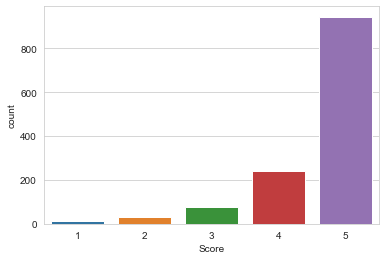

In [846]:
sns.countplot(x=kas['Score']);

We can group the reviews on 2 groups to see if that balances a bit the issue.

In [847]:
#kas['rating_binary'] = kas['Score'].apply(lambda x: 0 if x < 3 else 1)

## 1.4. Reviews lenght 

In [848]:
#we are gonna apply a lamba function into the column reviews. We split the words and count them.
kas['Length'] = kas['Review'].apply(lambda x: len(str(x).split()))


In [849]:
kas.head()

,Id,Score,Date,Title,Review,Length
0,798058056,1,2021-07-19,Poor communication,Poor communication towards freelancers. Not re...,15
1,796220834,5,2021-07-08,Fabulous,After an hour drive from Makkum in the Friesla...,121
2,792789843,5,2021-06-16,Nice Restaurant,If you go for 6 dishes they appear to have a w...,157
3,788354190,5,2021-05-09,Absolutely Delicious Food,My new favorite restaurant in Amsterdam!It pri...,70
4,778227856,5,2020-11-30,So fresh! So tasty!,Ingredients were freshly picked from the garde...,26


In [850]:
kas["Date"].min()

Timestamp('2008-08-02 00:00:00')

/Users/lauratll/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lauratll/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


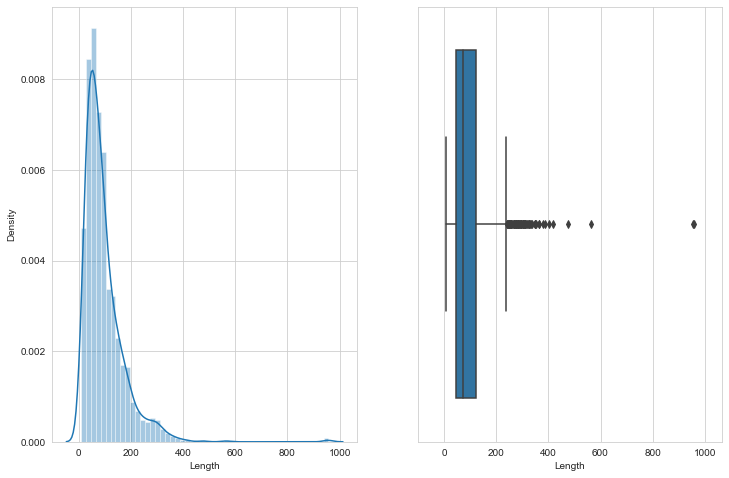

In [851]:
fig, ax = plt.subplots(1,2,figsize = (12,8),sharex=True)
sns.distplot( kas['Length'],ax=ax[0])
sns.boxplot( kas['Length'],ax=ax[1]);

The distribution of the lengths of the reviews is pretty skewed to the right.

In [852]:
kas[kas['Length'] == kas['Length'].max()]["Review"] #the longest review

997    Friends had told me about Da Kas, when I googl...
Name: Review, dtype: object

In [853]:
kas[kas['Length'] == kas['Length'].min()]["Review"] #the shortest review

1192    Very good tasting food and extremely good serv...
Name: Review, dtype: object

We wil have to think if the short reviews are bringing any interesting information.

In [854]:
#pd.set_option("display.max_colwidth",50) #50 to ome back to show 50 characters, if you place -1, you can read the
#whole string. We are applying this to the columns

In [855]:
kas['Length'].describe()

count    1308.000000
mean       95.458716
std        77.916906
min         8.000000
25%        45.750000
50%        74.000000
75%       122.250000
max       957.000000
Name: Length, dtype: float64

In [856]:
kas.groupby("Score")['Length'].mean() #negative 

Score
1    131.833333
2    129.939394
3    121.065789
4     95.884298
5     91.624339
Name: Length, dtype: float64

## 1.6. Character length

In [857]:
kas['num_charac'] = kas['Review'].apply(lambda x: len(x))

In [858]:
kas.groupby("Score")['num_charac'].mean() 

Score
1    722.083333
2    726.000000
3    664.078947
4    536.995868
5    518.559788
Name: num_charac, dtype: float64

# 2. Reviews cleaning

## 2.1. First cleaning

We will create a function to clean the review.

We will remove the non alpha- numeric characters, convert all to lower case, email adresses or html tags or websites.

In [859]:
### I would like to see how many entries hae digits on the Review colum

kas[kas["Review"].str.contains(r'\d+')]["Review"] #466 reviews have numbers...


1       After an hour drive from Makkum in the Friesla...
2       If you go for 6 dishes they appear to have a w...
6       We had a fantastic dinner, they took the Coron...
11      The food was nice and fresh, and the surroundi...
13      We were really looking forward to our dinner a...
                              ...                        
1299    I've been to De Kas eight times and used to lo...
1304    Ok, if you are planning on coming to Amsterdam...
1305    I had a great dinner at this restaurant in the...
1306    I went to De Kas with two friends that knew al...
1307    The only reason I did not give the absolute be...
Name: Review, Length: 466, dtype: object

We are gonna import a corpus with words that we consier would not be useful. We could append more words to this list. 

In [860]:
from nltk.corpus import stopwords

stop_words = list(stopwords.words('english')) 

In [861]:
def clean_reviews_func1(data,column):
    
    
    #we convert all the word to lowe case
    data["cleaned"] = data[column].apply(lambda text: text.lower())
    # replace non alphanumeric by spaces
    data["cleaned"] = data["cleaned"].apply(lambda text : re.sub(r'\W+',' ',text))
    # Replace urls by ''
    data["cleaned"] = data["cleaned"].apply(lambda text : re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',' ',text))
    #Remove sites
    data["cleaned"] = data["cleaned"].apply(lambda text : re.sub(r'www.\S+', ' ' ,text))
    #Remove Url's
    data["cleaned"] = data["cleaned"].apply(lambda text : re.sub(r'^(http|https|ftp|ssh)\S+', ' ',text))
    #Remove digits
    data["cleaned"] = data["cleaned"].apply(lambda text : re.sub(r'\d+',' ',text))
    #remove stop words, looping through the word in the review, if the word is not we return it if not
    data["cleaned"] = data["cleaned"].apply(lambda x : " ".join(word for word in x.split() if word not in stop_words))
    #apply the extra spaces function defined before
    data["cleaned"] = data["cleaned"].apply(lambda text: text.strip())

    return data
   


## We need to think about numbers and euros....    

In [862]:
kas = clean_reviews_func1(kas,"Review")

In [863]:
kas

,Id,Score,Date,Title,Review,Length,num_charac,cleaned
0,798058056,1,2021-07-19,Poor communication,Poor communication towards freelancers. Not re...,15,117,poor communication towards freelancers reliabl...
1,796220834,5,2021-07-08,Fabulous,After an hour drive from Makkum in the Friesla...,121,694,hour drive makkum friesland province meanderin...
2,792789843,5,2021-06-16,Nice Restaurant,If you go for 6 dishes they appear to have a w...,157,808,go dishes appear weekly menu options restauran...
3,788354190,5,2021-05-09,Absolutely Delicious Food,My new favorite restaurant in Amsterdam!It pri...,70,441,new favorite restaurant amsterdam prides servi...
4,778227856,5,2020-11-30,So fresh! So tasty!,Ingredients were freshly picked from the garde...,26,171,ingredients freshly picked garden restaurant d...
...,...,...,...,...,...,...,...,...
1303,23658332,5,2009-01-12,Original setup with yummy organic and (extreme...,Original setup with yummy organic and (extreme...,23,153,original setup yummy organic extremely local h...
1304,21557669,5,2008-11-04,Without any doubt the best restaurant in Amste...,"Ok, if you are planning on coming to Amsterdam...",94,515,ok planning coming amsterdam tourist means avo...
1305,19592320,5,2008-08-31,a new must in Amsterdam,I had a great dinner at this restaurant in the...,46,264,great dinner restaurant last week august start...
1306,18857462,4,2008-08-11,A greenhouse with fresh tasty food,I went to De Kas with two friends that knew al...,92,547,went de kas two friends knew already restauran...


No we are gonna look at the frecuency of words, to see if there are some that are not interesting for us, to be able to also remove them from the reviews.

## 2.2. Create own corpus for cleaning- Tokenizing

No we are gonna look at the frecuency of words, to see if there are some that are not interesting for us, to be able to also remove them from the reviews.

We will create a corpus, database, of words in the reviews. This is an specific set of common words in the reviews for restaurant, for example.

I will create a corpus for the bosy of the reviews and count their frecuency.



In [864]:
###the words in the whole set of reviews
def create_corpus(data, column):
    """
    Input a data frame, and the a string of the name of the column you want to create the corpus
    It produces two outcomes:
    - the list_tokens as a list of tokens
    - the one_string_tokens as a string with all tokens
    """
 
    #create an empty string
    one_string_tokens = ''
    #we add every word in the 
    for review in data[column]:
        one_string_tokens += review
#     corpus = nltk.sent_tokenize(reviews)
    list_tokens = word_tokenize(one_string_tokens)
    
    return list_tokens,one_string_tokens

In [865]:
#A function for checking the frecuency from the corpus

def check_frecuency_word (data,column):
    corpus_reviews = create_corpus(data,column)[0]
    freq_words = pd.Series(corpus_reviews).value_counts()
    return freq_words

In [866]:
#Check firt 50 words
check_frecuency_word(kas,"cleaned")[:50]

food           1191
restaurant      829
menu            668
service         552
greenhouse      536
kas             508
course          492
wine            466
great           440
de              439
good            432
amsterdam       429
experience      392
fresh           386
meal            377
one             367
place           338
staff           334
would           326
well            318
us              309
dinner          292
vegetables      292
really          274
table           270
beautiful       267
delicious       259
park            249
set             248
nice            246
time            232
dishes          232
also            232
like            227
lunch           221
excellent       219
grown           219
setting         218
friendly        215
main            208
worth           205
get             203
ingredients     197
go              196
lovely          194
courses         192
served          190
dish            188
every           186
best            186


We will look at the 50 first words, and decide to exclude some that might now be meaninful for the analysis.

We will create a new list with words to exclude and remove them from the review column.


In [867]:
other_stop_words = ['food','restaurant','kas','de','amsterdam','one','would','every','really','even',
                    'also','go','table','us']

In [868]:
kas["cleaned"] =kas["cleaned"].apply(lambda x:" ".join(word for word in x.split() 
                                                              if word not in other_stop_words))

We look again at the frecuencies:

In [869]:
#Check firt 50 words
check_frecuency_word(kas,"cleaned")[:50]

menu           668
service        552
greenhouse     531
course         492
wine           464
great          435
good           425
experience     388
fresh          386
meal           373
staff          334
place          334
well           317
vegetables     292
dinner         290
beautiful      260
delicious      257
park           249
set            244
nice           241
dishes         231
like           226
lunch          220
grown          219
setting        218
excellent      216
friendly       215
time           213
main           208
worth          205
get            201
ingredients    197
courses        192
lovely         192
served         189
dish           186
chef           183
amazing        180
eat            174
dining         173
best           173
day            172
evening        160
dessert        155
visit          155
special        153
made           153
recommend      150
fish           150
garden         149
dtype: int64

## 2.3. Stemming

Stemming and Lemmatization are Text Normalization (or sometimes called Word Normalization)
It does not keep a lookup table for actual stems of the word but applies algorithmic rules to generate stems. It uses the rules to decide whether it is wise to strip a suffix.

For now we will just define a function, but will apply lemmatization to the Reviews.

In [870]:
# len(list(wordfreq.keys()))

In [871]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()


def stem_word(data,column):
    data[column] = kas[column].apply(lambda x:" ".join(porter.stem(word) for word in x.split()))
    return data



## 2.4. Lemmatization

Lemmatization is similar to stemming but it brings context to the words.So it links words with similar meaning to one word. 

Lemmatization does morphological analysis of the words. In short, lemmatize the text so as to get its root form eg: functions,funtionality as function

In [872]:
#text blob is another library to do that ans also used for sentiment analysis.

In [873]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import wordnet

lemma = WordNetLemmatizer()


def lemmatize_word(data,column):
    data[column] = kas[column].apply(lambda x:" ".join(lemma.lemmatize(word) for word in x.split()))
    return data
    
    
#     return " ".join([lemma.lemmatize(word) for word in word_tokenize(data_text)])

In [874]:
kas = lemmatize_word(kas,"cleaned")
kas

,Id,Score,Date,Title,Review,Length,num_charac,cleaned
0,798058056,1,2021-07-19,Poor communication,Poor communication towards freelancers. Not re...,15,117,poor communication towards freelancer reliable...
1,796220834,5,2021-07-08,Fabulous,After an hour drive from Makkum in the Friesla...,121,694,hour drive makkum friesland province meanderin...
2,792789843,5,2021-06-16,Nice Restaurant,If you go for 6 dishes they appear to have a w...,157,808,dish appear weekly menu option serve given eve...
3,788354190,5,2021-05-09,Absolutely Delicious Food,My new favorite restaurant in Amsterdam!It pri...,70,441,new favorite pride serving creative absolutely...
4,778227856,5,2020-11-30,So fresh! So tasty!,Ingredients were freshly picked from the garde...,26,171,ingredient freshly picked garden dish beautifu...
...,...,...,...,...,...,...,...,...
1303,23658332,5,2009-01-12,Original setup with yummy organic and (extreme...,Original setup with yummy organic and (extreme...,23,153,original setup yummy organic extremely local h...
1304,21557669,5,2008-11-04,Without any doubt the best restaurant in Amste...,"Ok, if you are planning on coming to Amsterdam...",94,515,ok planning coming tourist mean avoid tourist ...
1305,19592320,5,2008-08-31,a new must in Amsterdam,I had a great dinner at this restaurant in the...,46,264,great dinner last week august starter desert m...
1306,18857462,4,2008-08-11,A greenhouse with fresh tasty food,I went to De Kas with two friends that knew al...,92,547,went two friend knew already nice experience s...


## 2.5. Second function for pre-processing the data

In [875]:
#remove extra words
#lemmatization 
#put all together

## 2.6. Another approach  keeping nouns, verbs and adjectives

If we would take this approach, we will keep just words like nouns, verbs and adjectives.

-   NN	Noun

-	JJ	Adjective

-   VB	Verb

In [876]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lauratll/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [877]:
def filter_review_by_gramma(x):
    words = []
    text = word_tokenize(x)
    tags = nltk.pos_tag(text)

    for tag in tags:
        if  re.search("JJ|NN|VB",tag[1]):
            words.append(tag[0])
            
    return " ".join(words)

#try as well removing the verbs?

In [878]:
kas["cleaned"].apply(lambda x : filter_review(x))[0]

'poor communication towards reliable unreasonable arrogant recommend place'

In [879]:
#nltk import me_chunk

# 3. Plots most frequent words

## 3.1. Negative Reviews

We like to create a wordcloud for each class.

In [880]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [1025]:
#Negative

negative_reviews = kas[kas["Score"] < 3]

In [1026]:
corpus_negative= create_corpus(negative_reviews, "cleaned")[1]

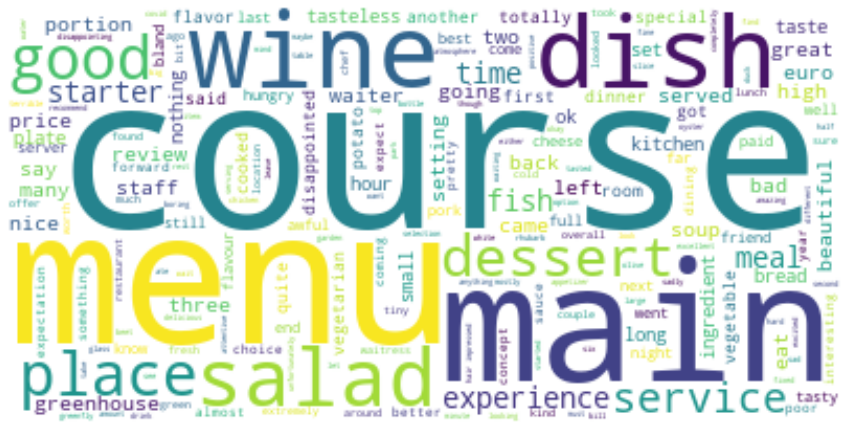

In [1027]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(corpus_negative)

ax = plt.figure(figsize=(15,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [1018]:
check_frecuency_word(negative_reviews,"cleaned")

course          32
menu            24
main            22
wine            21
dish            19
                ..
chance           1
instead          1
drawing          1
underwhelmed     1
explained        1
Length: 1196, dtype: int64

In [1020]:
check_frecuency_word(positive_reviews,"cleaned")

menu             638
course           587
greenhouse       544
wine             537
service          492
                ... 
approximately      1
accommodation      1
renew              1
terrifiic          1
cleverly           1
Length: 6216, dtype: int64

## 3.2. Neutral reviews

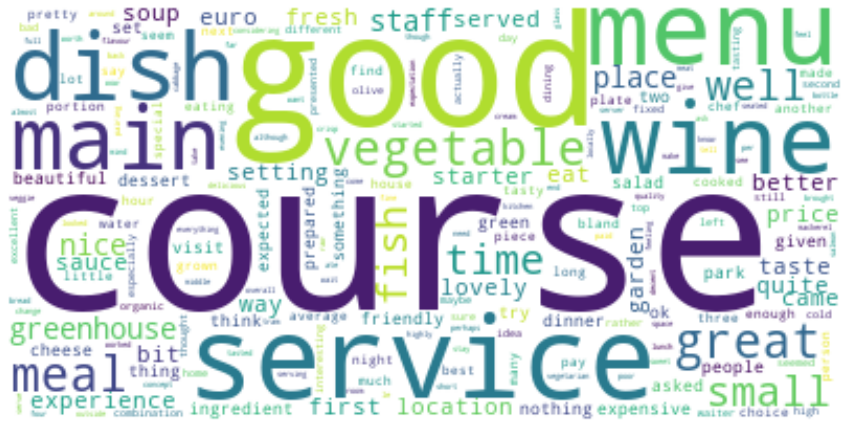

In [1029]:
#Neutral

neutral_reviews = kas[kas["Score"] == 3]
corpus_neutral= create_corpus(neutral_reviews, "cleaned")[1]

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(corpus_neutral)

ax = plt.figure(figsize=(15,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Looking at the cloud we see that costumers appreciate a lot 

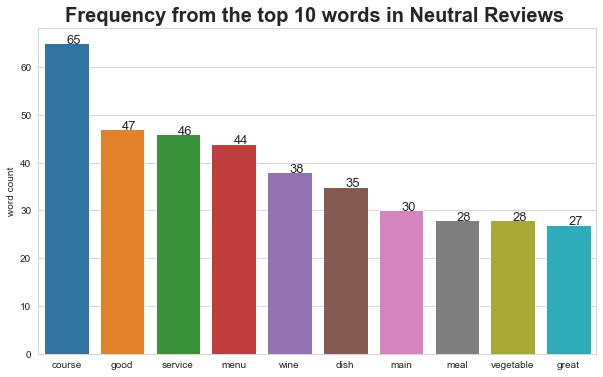

In [1030]:
top_10_neutral_reviews = check_frecuency_word(neutral_reviews,"cleaned")[:10]

sns.set_style("whitegrid")
fig, ax = plt.subplots(1,1,figsize = (10,6))
sns.barplot(x= top_10_neutral_reviews .index,y=top_10_neutral_reviews .values)
plt.title("Frequency from the top 10 words in Neutral Reviews ",fontsize=20, fontweight='bold')
ax.set_ylabel("word count")

for index,data in enumerate(top_10_neutral_reviews .values):
    plt.text(x=index , y =data , s=f"{data}",fontdict=dict(fontsize=13))

## 3.3. Positive Reviews

In [1006]:
#Positive reviews

positive_reviews = kas[kas["Score"] > 3]

In [1007]:
corpus_postive= create_corpus(postive_reviews, "cleaned")[1]

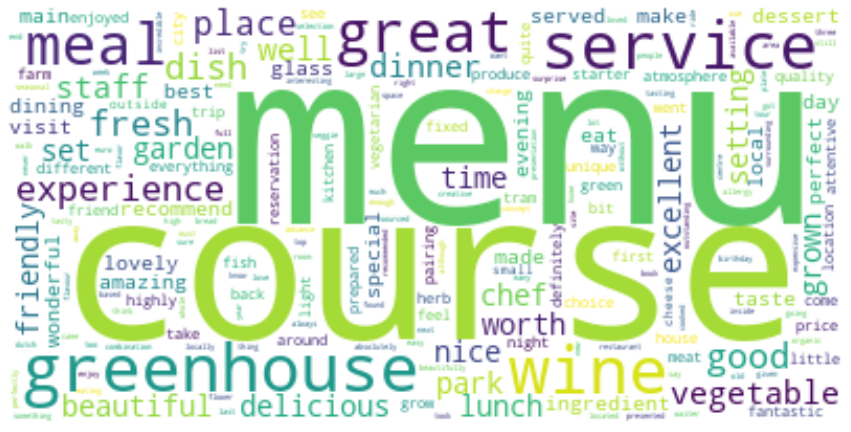

In [1008]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(corpus_postive)

ax = plt.figure(figsize=(15,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


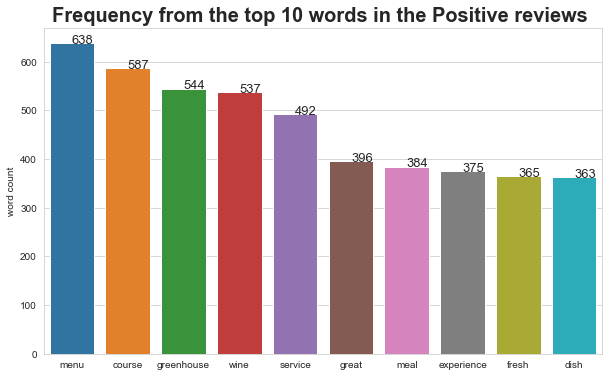

In [1010]:
top_10_postive_reviews= check_frecuency_word(positive_reviews ,"cleaned")[:10]

sns.set_style("whitegrid")
fig, ax = plt.subplots(1,1,figsize = (10,6))
sns.barplot(x= top_50_postive.index,y=top_50_postive.values)
plt.title("Frequency from the top 10 words in the Positive reviews ",fontsize=20, fontweight='bold')
ax.set_ylabel("word count")

for index,data in enumerate(top_50_postive.values):
    plt.text(x=index , y =data , s=f"{data}",fontdict=dict(fontsize=13))

# 4. Exploring specific features per class


What we try to see here is how many time an speciic workd that we think is an important feature in the restaurant or should be somehow evaluate by the costumers, appears in the reviews per class.

Due to class inbalance we will divide by the total of reviews from each class.

In [893]:
kas["Score"].value_counts()

5    945
4    242
3     76
2     33
1     12
Name: Score, dtype: int64

In [894]:
kas[kas["cleaned"].str.contains("meat")]["Score"].value_counts() /kas["Score"].value_counts()


1         NaN
2    0.090909
3    0.052632
4    0.082645
5    0.068783
Name: Score, dtype: float64

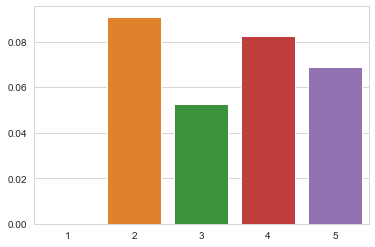

In [996]:
data=kas[kas["cleaned"].str.contains("meat")]["Score"].value_counts() /kas["Score"].value_counts()
sns.barplot( x=data.index, y=data.values);

In [895]:
kas[kas["cleaned"].str.contains("fish")]["Score"].value_counts()/kas["Score"].value_counts()


1    0.250000
2    0.090909
3    0.171053
4    0.132231
5    0.075132
Name: Score, dtype: float64

In [896]:
kas[kas["cleaned"].str.contains("seasonal")]["Score"].value_counts() /kas["Score"].value_counts()


1         NaN
2         NaN
3    0.013158
4    0.045455
5    0.055026
Name: Score, dtype: float64

In [897]:
kas[kas["cleaned"].str.contains("greenhouse")]["Score"].value_counts() /kas["Score"].value_counts()

5    0.385185
4    0.293388
3    0.236842
2    0.212121
1    0.250000
Name: Score, dtype: float64

In [898]:
kas[kas["cleaned"].str.contains("service")]["Score"].value_counts()/kas["Score"].value_counts()

5    0.378836
4    0.466942
3    0.539474
2    0.303030
1    0.333333
Name: Score, dtype: float64

In [899]:
kas[kas["cleaned"].str.contains("menu")]["Score"].value_counts()/kas["Score"].value_counts()

5    0.434921
4    0.450413
3    0.473684
2    0.454545
1    0.500000
Name: Score, dtype: float64

In [900]:
kas[kas["cleaned"].str.contains("fresh")]["Score"].value_counts()/kas["Score"].value_counts()

1         NaN
2    0.121212
3    0.236842
4    0.309917
5    0.314286
Name: Score, dtype: float64

In [901]:
kas[kas["cleaned"].str.contains("place")]["Score"].value_counts() /kas["Score"].value_counts()

5    0.242328
4    0.260331
3    0.289474
2    0.242424
1    0.416667
Name: Score, dtype: float64

# 5. Creating the data frame with the selected 50 top words

In [902]:
freq_50_words = check_frecuency_word(kas,"cleaned")[:50]
freq_50_words 

menu          706
course        684
wine          596
greenhouse    577
service       553
great         435
meal          427
good          425
dish          417
experience    407
fresh         386
place         368
vegetable     343
staff         336
well          317
dinner        300
beautiful     260
delicious     257
park          252
time          251
set           250
chef          245
nice          241
garden        237
like          233
lunch         226
setting       223
grown         219
excellent     216
friendly      215
main          214
get           210
ingredient    207
worth         206
day           197
lovely        192
served        189
amazing       180
eat           174
dining        173
best          173
dessert       170
taste         162
evening       162
visit         158
made          153
special       153
local         152
glass         150
recommend     150
dtype: int64

In [903]:
kas_dummy = kas.copy()

frequent_50_words= [word for word in freq_50_words.index]

kas_dummy[frequent_50_words]= 0


In [904]:
for word in frequent_50_words:
    kas_dummy[word] = np.where(kas_dummy["cleaned"].str.contains(word) ,1,0)

In [905]:
kas_dummy

,Id,Score,Date,Title,Review,Length,num_charac,cleaned,menu,course,...,best,dessert,taste,evening,visit,made,special,local,glass,recommend
0,798058056,1,2021-07-19,Poor communication,Poor communication towards freelancers. Not re...,15,117,poor communication towards freelancer reliable...,0,0,...,0,0,0,0,0,0,0,0,0,1
1,796220834,5,2021-07-08,Fabulous,After an hour drive from Makkum in the Friesla...,121,694,hour drive makkum friesland province meanderin...,0,0,...,0,0,0,0,0,0,0,0,0,0
2,792789843,5,2021-06-16,Nice Restaurant,If you go for 6 dishes they appear to have a w...,157,808,dish appear weekly menu option serve given eve...,1,1,...,0,0,0,1,0,0,1,0,1,1
3,788354190,5,2021-05-09,Absolutely Delicious Food,My new favorite restaurant in Amsterdam!It pri...,70,441,new favorite pride serving creative absolutely...,0,0,...,0,0,0,0,0,0,0,0,0,1
4,778227856,5,2020-11-30,So fresh! So tasty!,Ingredients were freshly picked from the garde...,26,171,ingredient freshly picked garden dish beautifu...,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,23658332,5,2009-01-12,Original setup with yummy organic and (extreme...,Original setup with yummy organic and (extreme...,23,153,original setup yummy organic extremely local h...,0,0,...,0,0,0,0,0,0,0,1,0,0
1304,21557669,5,2008-11-04,Without any doubt the best restaurant in Amste...,"Ok, if you are planning on coming to Amsterdam...",94,515,ok planning coming tourist mean avoid tourist ...,0,0,...,1,0,1,0,1,0,0,0,0,1
1305,19592320,5,2008-08-31,a new must in Amsterdam,I had a great dinner at this restaurant in the...,46,264,great dinner last week august starter desert m...,0,0,...,0,0,0,0,0,0,0,0,0,0
1306,18857462,4,2008-08-11,A greenhouse with fresh tasty food,I went to De Kas with two friends that knew al...,92,547,went two friend knew already nice experience s...,1,1,...,0,1,1,0,0,0,0,0,0,1


# 6. Time series visualizations

# 7. Fixing the clas unbalance

We are gonna look at how many samples we have per class. 

In [906]:
kas["Score"].value_counts()

5    945
4    242
3     76
2     33
1     12
Name: Score, dtype: int64

In [806]:
(945+2)/2

473.5

In [908]:
kasd5 = kas_dummy [kas_dummy ['Score'] == 5].index
index_kas_dummy5 = np.random.choice(kasd5, size = 475, replace = False)
kas_d_5=kas_dummy.iloc[index_kas_dummy5,:]

#we use replace True on the classes with less than 475 entries

kasd4 = kas_dummy [kas_dummy ['Score'] == 4].index
index_kas_dummy4 = np.random.choice(kasd4, size = 475, replace = True)
kas_d_4=kas_dummy.iloc[index_kas_dummy4,:]


kasd3 = kas_dummy [kas_dummy ['Score'] == 3].index
index_kas_dummy3 = np.random.choice(kasd3, size = 475, replace = True)
kas_d_3=kas_dummy.iloc[index_kas_dummy3,:]


kasd2 = kas_dummy [kas_dummy ['Score'] == 2].index
index_kas_dummy2= np.random.choice(kasd2, size = 475, replace = True)
kas_d_2=kas_dummy.iloc[index_kas_dummy2,:]


kasd1 = kas_dummy [kas_dummy ['Score'] == 1].index
index_kas_dummy1 = np.random.choice(kasd1, size = 475, replace = True)
kas_d_1=kas_dummy.iloc[index_kas_dummy1,:]


In [1031]:
balanced_kas_dummy = pd.concat([kas_d_1,kas_d_2,kas_d_3,kas_d_4,kas_d_5],axis=0).reset_index(drop=True)

# 8. Building models

In [971]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test,model):



    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))
    
    plot_confusion_matrix(model,X_test,y_test);

## 8.1.Split data

In [573]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import cohen_kappa_score, classification_report, plot_confusion_matrix

In [929]:
def split_data(df):

    X = df.drop(["Id", "Date", "Review","Title","cleaned","Score"], axis=1)
    y = df["Score"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5,stratify = y)

    return X_train, X_test, y_train, y_test 

#stratify = y
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

## 8.2. Randoom Forest Classifier  with unbalanced classes

In [975]:
X_train, X_test, y_train, y_test  = split_data(kas_dummy)

In [976]:
from sklearn.model_selection import GridSearchCV,cross_validate
from sklearn.ensemble import RandomForestClassifier


params = {'n_estimators': [100, 200], 'max_depth' : [2,6,10,15,20]}


grid_rfc = GridSearchCV(RandomForestClassifier(), params, cv=5)

grid_rfc.fit(X_train,y_train)

grid_rfc.best_estimator_

#RandomForestClassifier(max_depth=10)

RandomForestClassifier(max_depth=20)

In [977]:
grid_rfc.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [978]:
grid_rfc.best_score_

0.7256322624743677

In [979]:
y_pred_train =grid_rfc.predict(X_train)

In [980]:
y_pred_test =grid_rfc.predict(X_test)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        61
           4       1.00      0.99      1.00       193
           5       1.00      1.00      1.00       756

    accuracy                           1.00      1046
   macro avg       1.00      1.00      1.00      1046
weighted avg       1.00      1.00      1.00      1046

Results obtained for the TEST SET
The Cohen's Kappa is: 0.04
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        15
           4       0.29      0.04      0.07        49
           5       0.73      0.98      0.84       189

    accuracy                           0.72       262
   macro

/Users/lauratll/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lauratll/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lauratll/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


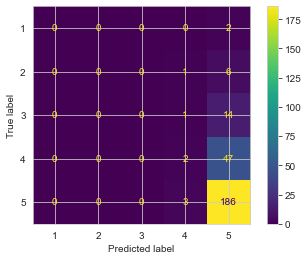

In [981]:
model_performance_class(y_train, y_pred_train, y_test, y_pred_test,grid_rfc)

I am gonna look at the importance of the paramenters.

In [944]:
importance = list(grid_rfc.best_estimator_.feature_importances_)


In [968]:
cols = list(X_train.columns)

pd.DataFrame(zip(cols,importance),columns= ["Feature","Importance"])

,Feature,Importance
0,Length,0.088464
1,num_charac,0.094222
2,menu,0.016495
3,course,0.017309
4,wine,0.018750
5,greenhouse,0.013829
6,service,0.023151
7,great,0.027813
8,meal,0.018225
9,good,0.023372


## 8.3. Randoom Forest Classifier  with balanced classes

In [1032]:
X_train, X_test, y_train, y_test  = split_data(balanced_kas_dummy)

In [1033]:
params = {'n_estimators': [100, 200], 'max_depth' : [2,6,10,15,20]}


grid_rfc_2 = GridSearchCV(RandomForestClassifier(), params, cv=5)

grid_rfc_2.fit(X_train,y_train)

grid_rfc_2.best_estimator_

#RandomForestClassifier(max_depth=10)

RandomForestClassifier(max_depth=15, n_estimators=200)

In [1034]:
grid_rfc_2.best_params_

{'max_depth': 15, 'n_estimators': 200}

In [1035]:
grid_rfc_2.best_score_

0.9321052631578948

In [1036]:
y_pred_train =grid_rfc_2.predict(X_train)

In [1037]:
y_pred_test =grid_rfc_2.predict(X_test)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       380
           2       1.00      1.00      1.00       380
           3       1.00      1.00      1.00       380
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       380

    accuracy                           1.00      1900
   macro avg       1.00      1.00      1.00      1900
weighted avg       1.00      1.00      1.00      1900

Results obtained for the TEST SET
The Cohen's Kappa is: 0.91
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        95
           2       1.00      1.00      1.00        95
           3       0.96      1.00      0.98        95
           4       0.84      0.85      0.84        95
           5       0.85      0.80      0.83        95

    accuracy                           0.93       475
   macro

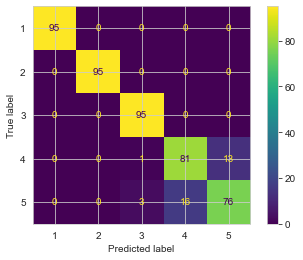

In [1038]:
model_performance_class(y_train, y_pred_train, y_test, y_pred_test,grid_rfc_2)

In [1039]:
importance = list(grid_rfc_2.best_estimator_.feature_importances_)

In [1040]:
cols = list(X_train.columns)

pd.DataFrame(zip(cols,importance), columns= ["Feature","Importance"])

,Feature,Importance
0,Length,0.093993
1,num_charac,0.096510
2,menu,0.017813
3,course,0.020614
4,wine,0.019444
5,greenhouse,0.015566
6,service,0.023772
7,great,0.020353
8,meal,0.018727
9,good,0.028684


## ?????. TF-IDF 

We are gonna convert a collection our reviews  into a matrix of TF-IDF features, considering 2 words together (2 g). We will use already the clean reviews, just maybe add some 2 words stop words. 

In [ ]:
stope_words_2g=[]

In [1042]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [1099]:
tidf = TfidfVectorizer(max_features = 200, ngram_range = (3,3), analyzer = 'word')

In [1100]:
X_tidf = tidf.fit_transform(kas["cleaned"])
y_tidf = kas['Score']

In [1081]:
len(tidf.get_feature_names())

100

In [1101]:
tidf.get_feature_names()

['amazing dining experience',
 'amazing highly recommend',
 'ask anything like',
 'attentive without fussy',
 'back next time',
 'based available garden',
 'beautifully prepared presented',
 'best dining experience',
 'best meal ever',
 'best meal trip',
 'best restaurant ever',
 'book well advance',
 'bread olive oil',
 'came highly recommended',
 'chocolate ice cream',
 'chose wine pairing',
 'city center worth',
 'come back next',
 'course cheese course',
 'course dinner menu',
 'course dinner wine',
 'course lunch menu',
 'course matching wine',
 'course meal wine',
 'course menu euro',
 'course set menu',
 'course tasting menu',
 'course wine pairing',
 'cross little bridge',
 'definitely back next',
 'definitely come back',
 'definitely worth visit',
 'delicious beautifully presented',
 'delicious great wine',
 'delicious highly recommend',
 'delicious wine selection',
 'dessert wine pairing',
 'dining experience definitely',
 'dining experience ever',
 'dining experience great',

In [1083]:
kas_tidf = kas.copy()

columns_tidf= [word for word in tidf.get_feature_names()]

kas_tidf[columns_tidf]= 0

In [1084]:
for words in columns_tidf:
    kas_tidf[words] = np.where(kas_tidf["cleaned"].str.contains(words) ,1,0)

In [1087]:
kas_tidf

,Id,Score,Date,Title,Review,Length,num_charac,cleaned,amuse bouche,attention detail,...,wait staff,well worth,went lunch,whole experience,wine list,wine pairing,wine selection,worth trip,worth visit,year ago
0,798058056,1,2021-07-19,Poor communication,Poor communication towards freelancers. Not re...,15,117,poor communication towards freelancer reliable...,0,0,...,0,0,0,0,0,0,0,0,0,0
1,796220834,5,2021-07-08,Fabulous,After an hour drive from Makkum in the Friesla...,121,694,hour drive makkum friesland province meanderin...,0,0,...,0,1,0,0,0,0,0,0,0,0
2,792789843,5,2021-06-16,Nice Restaurant,If you go for 6 dishes they appear to have a w...,157,808,dish appear weekly menu option serve given eve...,1,0,...,0,0,0,0,0,0,0,0,0,0
3,788354190,5,2021-05-09,Absolutely Delicious Food,My new favorite restaurant in Amsterdam!It pri...,70,441,new favorite pride serving creative absolutely...,0,0,...,0,0,0,0,0,0,0,0,0,0
4,778227856,5,2020-11-30,So fresh! So tasty!,Ingredients were freshly picked from the garde...,26,171,ingredient freshly picked garden dish beautifu...,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,23658332,5,2009-01-12,Original setup with yummy organic and (extreme...,Original setup with yummy organic and (extreme...,23,153,original setup yummy organic extremely local h...,0,0,...,0,0,0,0,0,0,0,0,0,0
1304,21557669,5,2008-11-04,Without any doubt the best restaurant in Amste...,"Ok, if you are planning on coming to Amsterdam...",94,515,ok planning coming tourist mean avoid tourist ...,0,0,...,0,0,0,0,0,0,0,0,0,0
1305,19592320,5,2008-08-31,a new must in Amsterdam,I had a great dinner at this restaurant in the...,46,264,great dinner last week august starter desert m...,0,0,...,0,0,0,0,0,0,0,0,0,0
1306,18857462,4,2008-08-11,A greenhouse with fresh tasty food,I went to De Kas with two friends that knew al...,92,547,went two friend knew already nice experience s...,0,0,...,0,0,0,0,1,0,0,0,0,0


In [1098]:
kas_tidf.groupby("Score")[columns_tidf].sum()

,amuse bouche,attention detail,beautiful park,beautiful setting,beautifully presented,best meal,bottle wine,cheese course,city center,come back,...,wait staff,well worth,went lunch,whole experience,wine list,wine pairing,wine selection,worth trip,worth visit,year ago
Score,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,1,0,0,2,0,0,1,...,1,0,0,0,1,1,2,1,0,1
3,1,1,0,0,1,1,1,1,2,2,...,1,1,0,0,1,4,1,0,2,3
4,5,2,2,3,3,1,3,0,1,5,...,3,7,4,3,14,15,6,5,10,3
5,11,13,18,18,23,29,9,15,17,25,...,19,48,15,14,36,84,20,16,18,10


In [ ]:
from sklearn.naive_bayes import CategoricalNB

In [ ]:
nb = CategoricalNB()